In [1]:
import numpy as np
import clima_anom as ca
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
hgt_dir = '../data/Hgt_500hPa_Jan80_Dec19.nc'

In [3]:
hgt_data = ca.read_netcdf(hgt_dir)

Number of variables:  5

hgt : (480, 1, 73, 144)
lat : (73,)
level : (1,)
lon : (144,)
time : (480,)

Dictionary created



In [4]:
lat = hgt_data['lat']
lon = hgt_data['lon']

In [5]:
hgt_data['time'][0],hgt_data['time'][-1]

(cftime.DatetimeGregorian(1980-01-01 00:00:00),
 cftime.DatetimeGregorian(2019-12-01 00:00:00))

In [6]:
hgt_dictionary = ca.clima_anom(hgt_data['hgt'][:,0,:,:])


Keys level 1:  dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
keys level 2:  dict_keys(['data', 'clim', 'anom'])

Numbers of years:  40
Numbers of months:  480


In [7]:
hgt_summer = ca.season(hgt_dictionary,1)
hgt_autumn = ca.season(hgt_dictionary,2)
hgt_winter = ca.season(hgt_dictionary,3)
hgt_spring = ca.season(hgt_dictionary,4)

SUMMER Climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)

AUTUMN climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)
WINTER Climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)
SPRING Climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)


In [8]:
np.shape(hgt_spring[1])

(39, 73, 144)

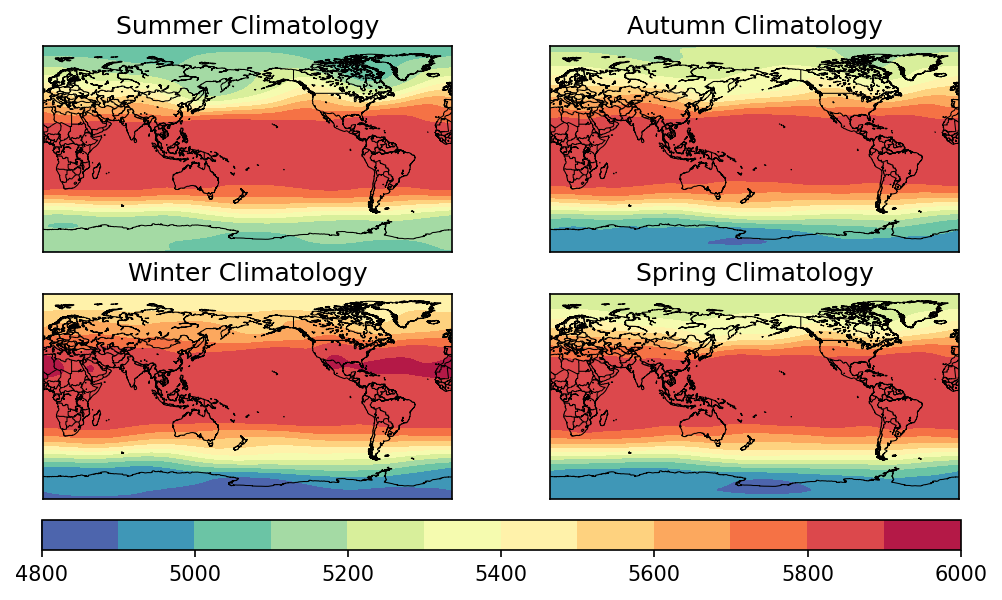

In [9]:
levels = np.arange(4800,6100,100)
cmap = plt.cm.Spectral_r

fig1 = plt.figure(figsize=(8,4),dpi=150)
m1 = Basemap(projection='cyl',llcrnrlat=min(lat),urcrnrlat=max(lat),llcrnrlon=min(lon),urcrnrlon=max(lon),resolution='l')

plt.subplot(2,2,1)
cmap = plt.cm.Spectral_r
m1.drawcoastlines(linewidth=0.5)
m1.drawcountries(linewidth=0.5)

lons,lats = np.meshgrid(lon,lat)
x,y = m1(lons,lats)

a1 = plt.contourf(x,y,hgt_summer[0],levels=levels,cmap=cmap)
plt.title('Summer Climatology')

plt.subplot(2,2,2)
cmap = plt.cm.Spectral_r
m1.drawcoastlines(linewidth=0.5)
m1.drawcountries(linewidth=0.5)

lons,lats = np.meshgrid(lon,lat)
x,y = m1(lons,lats)

a1 = plt.contourf(x,y,hgt_autumn[0],levels=levels,cmap=cmap)
plt.title('Autumn Climatology')

plt.subplot(2,2,3)
cmap = plt.cm.Spectral_r
m1.drawcoastlines(linewidth=0.5)
m1.drawcountries(linewidth=0.5)

lons,lats = np.meshgrid(lon,lat)
x,y = m1(lons,lats)

a1 = plt.contourf(x,y,hgt_winter[0],levels=levels,cmap=cmap)
plt.title('Winter Climatology')

plt.subplot(2,2,4)
cmap = plt.cm.Spectral_r
m1.drawcoastlines(linewidth=0.5)
m1.drawcountries(linewidth=0.5)

lons,lats = np.meshgrid(lon,lat)
x,y = m1(lons,lats)

a1 = plt.contourf(x,y,hgt_spring[0],levels=levels,cmap=cmap)
plt.title('Spring Climatology')

cbaxes = fig1.add_axes([0.1295, 0.04, 0.766, 0.05]) 
cb = plt.colorbar(a1,cax = cbaxes,orientation="horizontal")  

plt.savefig('../fig/Monthly_Seasonal.png',transparent = False,bbox_inches ='tight',pad_inches = 0.4)